<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ufidon/ml/blob/main/mod1/mpl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ufidon/ml/blob/main/mod1/mpl.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br>

Matplotlib introduction
---
- supports various visualization such as
  - 2D,3D 
  - image
  - animation
- two modes
  - interactive mode mainly for interaction
    - the figure is created implicitly
  - OOP (object-oriented programming ) mode
    - recommended for programming

In [1]:
import sys, math
import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt

## Plot math functions


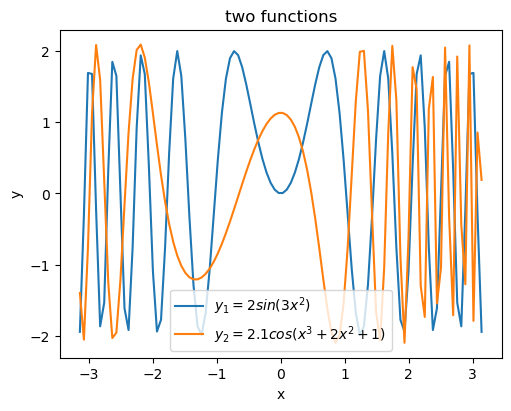

In [2]:
# 1. plot math functions
x = np.linspace(-np.pi, np.pi, 100)
y1 = 2*np.sin(3*x**2)
y2 = 2.1*np.cos(x**3+2*x**2+1)

# OOP mode, the figure is created explicitly
fig, ax = plt.subplots(figsize=(5,4), layout='constrained')

ax.plot(x, y1, label='$y_1=2sin(3x^2)$')
ax.plot(x, y2, label = '$y_2=2.1cos(x^3+2x^2+1)$')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('two functions')
ax.legend();


## Visualize pandas series

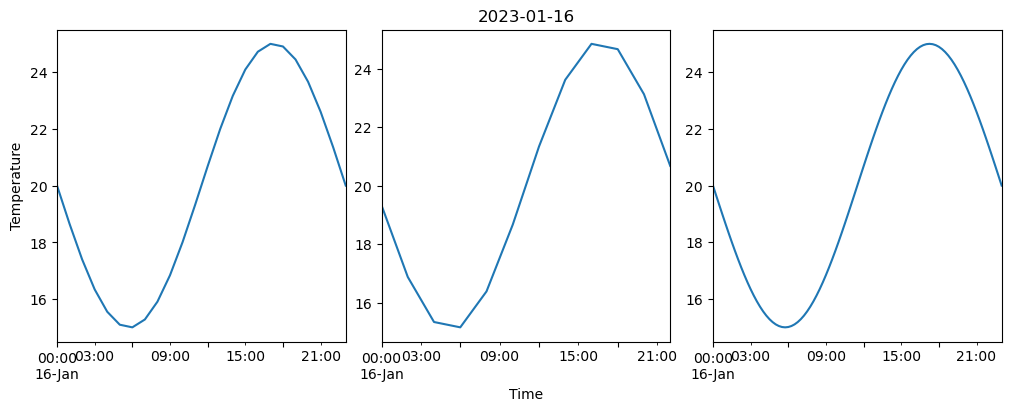

In [3]:
# temperature of 24 hours
aday = pd.date_range('2023-01-16 12:00am', periods=24, freq='H')
temperatures = 5*np.sin(np.linspace(-np.pi, np.pi, 24))+20
temp_series = pd.Series(data=temperatures, index=aday)

# resampling
temp_series_per_2H = temp_series.resample('2H').mean()

# upsampling and interpolation
temp_series_per_15m = temp_series.resample('15min').interpolate(method='cubic')

fig0, (ax01,ax02,ax03) = plt.subplots(1,3, figsize=(10,4), layout='constrained')

temp_series.plot(ax=ax01, kind='line')
temp_series_per_2H.plot(ax=ax02, kind='line')
temp_series_per_15m.plot(ax=ax03, kind='line')

ax02.set_xlabel('Time')
ax01.set_ylabel('Temperature')
ax02.set_title('2023-01-16')
for a in (ax01,ax02,ax03):
  a.set_xticks(aday[0:-1:6])


## Visualize pandas dataframe
- [weather.csv](https://raw.githubusercontent.com/ufidon/ml/main/mod1/weather.csv)

In [4]:
# NOTE: upload 'weather.csv' to the current folder if you use online environment
# check 'weather.csv' is in the current folder
if "google.colab" in sys.modules:
  !wget "https://raw.githubusercontent.com/ufidon/ml/main/mod1/weather.csv"
  
!ls weather.csv 

weather.csv


In [5]:
# load data into dataframe from csv file
df = pd.read_csv('./weather.csv', index_col='Date')
df

,Precipitation,Sunshine,Wind speed,Air quality,PM2.5,Oxygen,Grade
Date,,,,,,,
2023-01-15,9.228843,9.984145,9.792628,10.558100,7.7,0.222,Good
2023-01-16,9.714162,10.094669,12.179760,9.776506,5.6,0.256,Bad
2023-01-17,10.874592,12.057866,8.509492,11.097322,3.2,0.256,Good
2023-01-18,8.150065,11.903451,9.977066,9.469151,9.8,0.256,Bad
2023-01-19,9.823794,8.481519,9.836659,9.512974,4.5,0.256,Bad


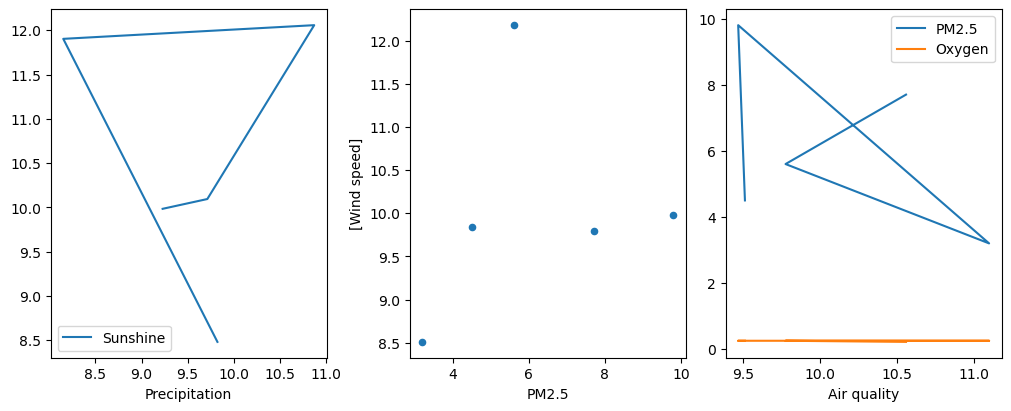

In [6]:
f1, (a1,a2,a3) = plt.subplots(1,3, figsize=(10,4), layout='constrained')

df.plot(ax=a1, kind='line', x='Precipitation', y=['Sunshine',])
df.plot(ax=a2, kind='scatter', x='PM2.5', y=['Wind speed',])
df.plot(ax=a3, kind='line', x='Air quality', y=['PM2.5', 'Oxygen']);


## Image
- The [jump spider image](https://github.com/ufidon/ml/blob/main/mod1/img/js.jpg) is from [Wikipedia](https://en.wikipedia.org/wiki/Jumping_spider)

In [ ]:
# NOTE: upload the jump spider image 'js.jpg' to the current folder if you use online environment
# create an img folder and move 'js.jpg'  from the current folder to the img folder
if "google.colab" in sys.modules:
  !wget "https://raw.githubusercontent.com/ufidon/ml/main/mod1/img/js.jpg"

In [8]:
# load image into a numpy array
if "google.colab" in sys.modules:
  jumpSpider = np.asarray(plt.imread('./js.jpg'))
else:
  jumpSpider = np.asarray(plt.imread('./img/js.jpg'))
  
jumpSpider.shape

(610, 800, 3)

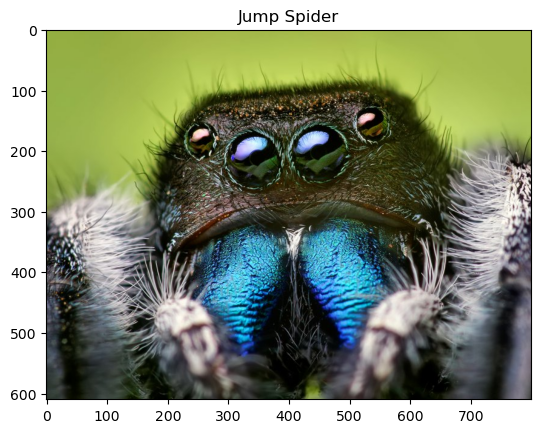

In [9]:
# show image
# interaction mode, the figure is created implicitly
jsplot = plt.imshow(jumpSpider)
plt.title('Jump Spider');

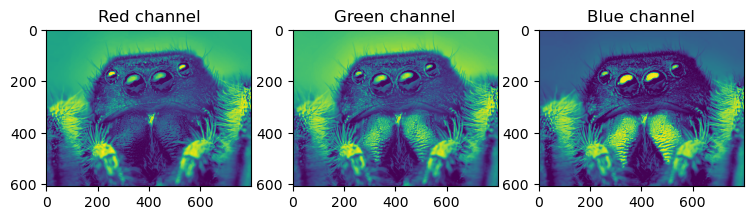

In [10]:
# show the rgb color channel separately
# pseudocolor is automatically applied on single-channel, grayscale and luminosity images
# the default colormap (aka lookup table, LUT), called viridis, is applied. 

fimg, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(9,3.1))
ax1.imshow(jumpSpider[:,:,0])
ax2.imshow(jumpSpider[:,:,1])
ax3.imshow(jumpSpider[:,:,2])

ax1.set_title('Red channel')
ax2.set_title('Green channel')
ax3.set_title('Blue channel');

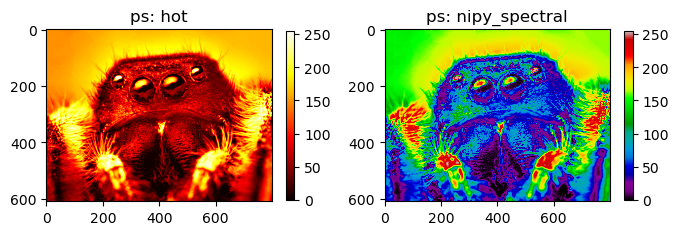

In [11]:
# apply other pseudocolor schemes
jsR = jumpSpider[:,:,0]
f2, (a21,a22) = plt.subplots(1,2,figsize=(8,4))
m1 = a21.imshow(jsR, cmap='hot')
f2.colorbar(m1, ax=a21, shrink=0.55)
m2 = a22.imshow(jsR, cmap='nipy_spectral')
f2.colorbar(m2, ax=a22, shrink=0.55)

a21.set_title('ps: hot')
a22.set_title('ps: nipy_spectral');

# References
- [matplotlib user manual](https://matplotlib.org/stable/users/index.html)